In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
#STEP 1:LOADING DATASET
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
dataset_path= "student-mat.csv"

In [4]:
#DOWNLOAD AND LOAD THE DATASET
import urllib.request
import zipfile

In [5]:
#DOWNLOAD THE DATASET
urllib.request.urlretrieve(url,"student.zip")

('student.zip', <http.client.HTTPMessage at 0x18174a13ec0>)

In [6]:
#EXTRACT THE DATASET
with zipfile.ZipFile("student.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [7]:
#LOAD THE DATA INTO A DATAFRAME
data=pd.read_csv("student-mat.csv",sep=";")
print("Data loaded successfully!")

Data loaded successfully!


In [8]:
#STEP 2:DATA EXPLORATION
print(data.head()) #display7 the first few rows
print("\nDataset Info:")
print(data.info()) #Check datatypes and missing values

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
D

In [9]:
#STEP 3 DATA CLEANING -- CHECK FOR MISSING VALUES
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [10]:
#REMOVE DUPLICATES
data=data.drop_duplicates()

In [11]:
#STEP 4:DATA ANALYSIS---QUESTION 1: What is the average score in math (G3)?
average_score=data['G3'].mean()
print(f"\nAverage Math Score (G3): {average_score:.2f}")



Average Math Score (G3): 10.42


In [12]:
#QUESTION 2: How many students scored above 15 in their final grade (G3)?
students_above_15=len(data[data['G3']>15])
print(f"Number of students scoring above 15:{students_above_15}")

Number of students scoring above 15:40


In [13]:
#QUESTION 3: Is there a correlation between study time (study time) and the final grade (G3)?
correlation=data['studytime'].corr(data['G3'])
print(f"correlation between study time and final grade:{correlation:.2f}")

correlation between study time and final grade:0.10


In [14]:
#QUESTION 4: Which gender has a higher average final grade (G3)?
average_grade_by_gender=data.groupby('sex')['G3'].mean()
print("\nAverage Final Grade by Gender:")
print(average_grade_by_gender)


Average Final Grade by Gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


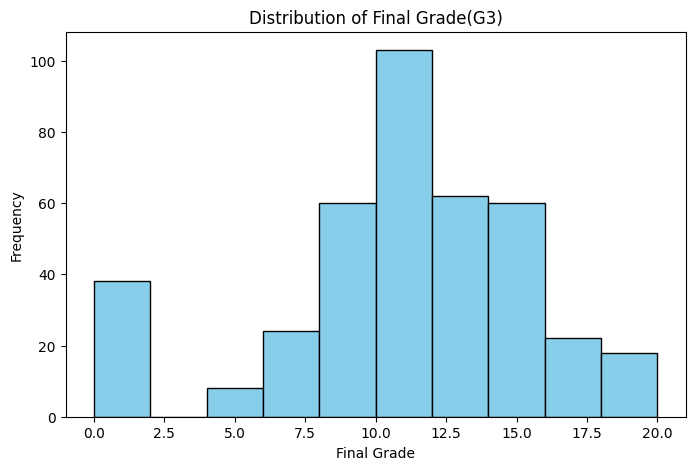

In [15]:
#STEP 5: DATA VISUALIZATION -- HISTOGRAM OF FINAL GRADE
plt.figure(figsize=(8,5))
plt.hist(data['G3'],bins=10,color='skyblue',edgecolor='black')
plt.title("Distribution of Final Grade(G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()



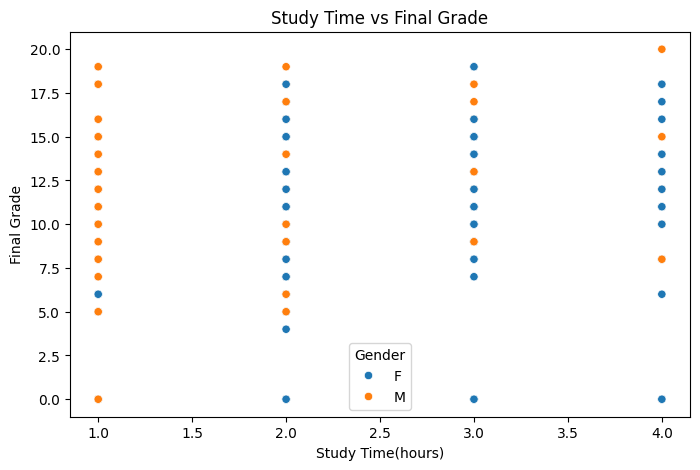

In [17]:
#SCATTER PLOT OF STUDY TIME VS. FINAL GRADE
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='studytime',y='G3',hue='sex')
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time(hours)")
plt.ylabel("Final Grade")
plt.legend(title="Gender")
plt.show()

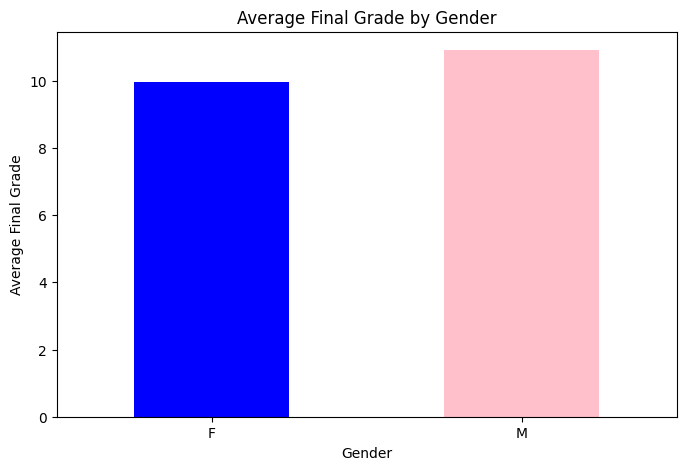

In [18]:
#BAR CHART OF AVERAGE SCORES BY GENDER
plt.figure(figsize=(8,5))
average_grade_by_gender.plot(kind='bar',color=['blue','pink'])
plt.title("Average Final Grade by Gender")
plt.ylabel("Average Final Grade")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()